# Setup

In [ ]:
from tensorflow.keras import datasets
import tensorflow as tf
import tensorflow.keras.layers as tfl
import matplotlib.pyplot as plt
import numpy as np

2023-03-08 16:23:27.733503: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
y_train=y_train.flatten() #to turn (x,1) to (x,) 
y_test=y_test.flatten()

In [ ]:
y_train[2020] #(#index= catagorical value) #20=4, #21=3, #22=6, #23=6, #24=2, #25=6, #2000=7, #2020=9

9

In [ ]:
y_test[2020] #(#index= catagorical value) #20=7, #21=0, #22=4, #23=9, #24=5, #25=2, #2000=1, #2020=9

9

In [ ]:
y_train = tf.one_hot(y_train.astype(np.int32), depth=10) #better than OneHotEncoding bc 0=10...00, 9=00...01, 7=0...100
                                                         #Does not need to be reshuffled to be in the right order
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

In [ ]:
y_train[2020]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)>

In [ ]:
y_test[2020]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)>

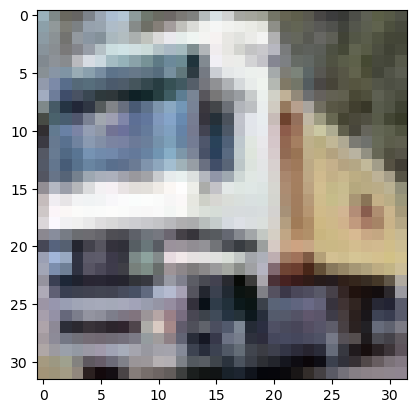

In [ ]:
plt.imshow(X_train[1])

In [ ]:
print(X_train[1][31][31])
print(X_test[1][31][31])

[143 133 144]
[186 200 199]


In [ ]:
print(X_train[1][31][31])
print(X_test[1][31][31]) 

[0.56078431 0.52156863 0.56470588]
[0.72941176 0.78431373 0.78039216]


# Implement CNN (Q5)

Normalization using min-max for range[0,1]

In [ ]:
X_train = (X_train - X_train.min()) / (X_train.max() - X_train.min()) #same as /255 but read online min-max is better
X_test = (X_test - X_test.min()) / (X_test.max() - X_test.min())

In [ ]:
model = tf.keras.models.Sequential() #influenced by https://www.tensorflow.org/tutorials/images/cnn
model.add(tfl.Conv2D(128, (3, 3), padding="same", activation="relu", input_shape=(32, 32, 3)))
model.add(tfl.MaxPooling2D((2, 2)))
model.add(tfl.Conv2D(256, (3, 3), activation='relu'))
model.add(tfl.MaxPooling2D((2, 2)))
model.add(tfl.Flatten()) 
model.add(tfl.Dense(256, activation= 'relu' )) #2 layers w 256 hidden units
model.add(tfl.Dense(256,  activation= 'relu' ))
model.add(tfl.Dense(10,  activation= 'softmax' ))


In [ ]:
model.compile(optimizer='adam',
              loss= 'categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=30, 
                    validation_data=(X_test, y_test))

Epoch 1/30
1563/1563 [==============================] - 102s 65ms/step - loss: 1.3279 - accuracy: 0.5210 - val_loss: 1.0468 - val_accuracy: 0.6345
Epoch 2/30
1563/1563 [==============================] - 102s 65ms/step - loss: 0.9346 - accuracy: 0.6693 - val_loss: 0.9824 - val_accuracy: 0.6562
Epoch 3/30
1563/1563 [==============================] - 101s 65ms/step - loss: 0.7574 - accuracy: 0.7347 - val_loss: 0.8677 - val_accuracy: 0.7003
Epoch 4/30
1563/1563 [==============================] - 101s 64ms/step - loss: 0.6171 - accuracy: 0.7824 - val_loss: 0.9095 - val_accuracy: 0.6941
Epoch 5/30
1563/1563 [==============================] - 101s 65ms/step - loss: 0.5058 - accuracy: 0.8212 - val_loss: 0.8883 - val_accuracy: 0.7198
Epoch 6/30
1563/1563 [==============================] - 101s 65ms/step - loss: 0.4042 - accuracy: 0.8574 - val_loss: 0.9177 - val_accuracy: 0.7146
Epoch 7/30
1563/1563 [==============================] - 101s 65ms/step - loss: 0.3207 - accuracy: 0.8868 - val_loss: 1

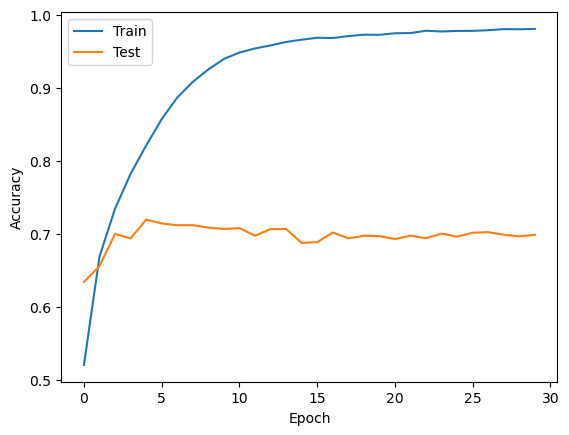

In [ ]:
plt.figure()
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Demonstrates overfitting better than accuracy

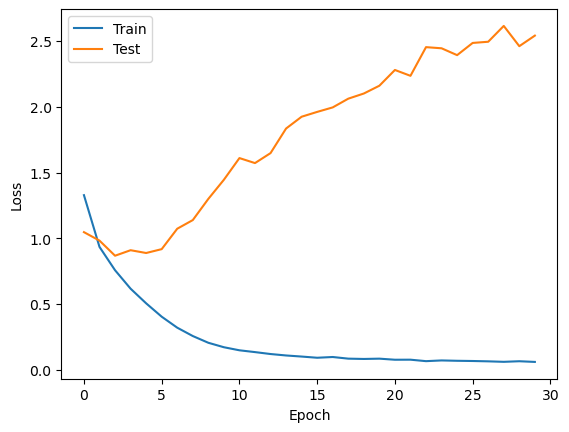

In [ ]:
plt.figure()
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# RESNET CNN

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#influenced by https://www.kaggle.com/code/ramezashendy/cifar-10-pretrained-resnet/notebook
pretrained_model = tf.keras.applications.EfficientNetB0(include_top=False) #remove fully connected layer using include_top

In [ ]:
for layer in pretrained_model.layers: #freeze all convulotion layers
    if isinstance(layer, tfl.Conv2D):
      layer.trainable=False

In [ ]:
#Reset train/test
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [ ]:
y_train=y_train.flatten() #to turn (x,1) to (x,) 
y_test=y_test.flatten()

In [ ]:
y_train = tf.one_hot(y_train.astype(np.int32), depth=10) #better than OneHotEncoding bc 0=10...00, 9=00...01, 7=0...100
                                                         #Does not need to be reshuffled to be in the right order
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow(X_train, y_train, batch_size = 32)
test_set = test_datagen.flow(X_test, y_test, batch_size = 32)

In [ ]:
pretrained_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling_2 (Rescaling)        (None, None, None,   0           ['input_2[0][0]']                
                                3)                                                                
                                                                                                  
 normalization_1 (Normalization  (None, None, None,   7          ['rescaling_2[0][0]']            
 )                              3)                                                   

                                                                                                  
 block2a_se_excite (Multiply)   (None, None, None,   0           ['block2a_activation[0][0]',     
                                96)                               'block2a_se_expand[0][0]']      
                                                                                                  
 block2a_project_conv (Conv2D)  (None, None, None,   2304        ['block2a_se_excite[0][0]']      
                                24)                                                               
                                                                                                  
 block2a_project_bn (BatchNorma  (None, None, None,   96         ['block2a_project_conv[0][0]']   
 lization)                      24)                                                               
                                                                                                  
 block2b_e

                                144)                              'block3a_se_expand[0][0]']      
                                                                                                  
 block3a_project_conv (Conv2D)  (None, None, None,   5760        ['block3a_se_excite[0][0]']      
                                40)                                                               
                                                                                                  
 block3a_project_bn (BatchNorma  (None, None, None,   160        ['block3a_project_conv[0][0]']   
 lization)                      40)                                                               
                                                                                                  
 block3b_expand_conv (Conv2D)   (None, None, None,   9600        ['block3a_project_bn[0][0]']     
                                240)                                                              
          

 block4a_project_conv (Conv2D)  (None, None, None,   19200       ['block4a_se_excite[0][0]']      
                                80)                                                               
                                                                                                  
 block4a_project_bn (BatchNorma  (None, None, None,   320        ['block4a_project_conv[0][0]']   
 lization)                      80)                                                               
                                                                                                  
 block4b_expand_conv (Conv2D)   (None, None, None,   38400       ['block4a_project_bn[0][0]']     
                                480)                                                              
                                                                                                  
 block4b_expand_bn (BatchNormal  (None, None, None,   1920       ['block4b_expand_conv[0][0]']    
 ization) 

                                                                                                  
 block4c_drop (Dropout)         (None, None, None,   0           ['block4c_project_bn[0][0]']     
                                80)                                                               
                                                                                                  
 block4c_add (Add)              (None, None, None,   0           ['block4c_drop[0][0]',           
                                80)                               'block4b_add[0][0]']            
                                                                                                  
 block5a_expand_conv (Conv2D)   (None, None, None,   38400       ['block4c_add[0][0]']            
                                480)                                                              
                                                                                                  
 block5a_e

                                112)                              'block5a_project_bn[0][0]']     
                                                                                                  
 block5c_expand_conv (Conv2D)   (None, None, None,   75264       ['block5b_add[0][0]']            
                                672)                                                              
                                                                                                  
 block5c_expand_bn (BatchNormal  (None, None, None,   2688       ['block5c_expand_conv[0][0]']    
 ization)                       672)                                                              
                                                                                                  
 block5c_expand_activation (Act  (None, None, None,   0          ['block5c_expand_bn[0][0]']      
 ivation)                       672)                                                              
          

 block6b_expand_conv (Conv2D)   (None, None, None,   221184      ['block6a_project_bn[0][0]']     
                                1152)                                                             
                                                                                                  
 block6b_expand_bn (BatchNormal  (None, None, None,   4608       ['block6b_expand_conv[0][0]']    
 ization)                       1152)                                                             
                                                                                                  
 block6b_expand_activation (Act  (None, None, None,   0          ['block6b_expand_bn[0][0]']      
 ivation)                       1152)                                                             
                                                                                                  
 block6b_dwconv (DepthwiseConv2  (None, None, None,   28800      ['block6b_expand_activation[0][0]
 D)       

                                                                                                  
 block6d_expand_conv (Conv2D)   (None, None, None,   221184      ['block6c_add[0][0]']            
                                1152)                                                             
                                                                                                  
 block6d_expand_bn (BatchNormal  (None, None, None,   4608       ['block6d_expand_conv[0][0]']    
 ization)                       1152)                                                             
                                                                                                  
 block6d_expand_activation (Act  (None, None, None,   0          ['block6d_expand_bn[0][0]']      
 ivation)                       1152)                                                             
                                                                                                  
 block6d_d

                                1280)                                                             
                                                                                                  
 top_activation (Activation)    (None, None, None,   0           ['top_bn[0][0]']                 
                                1280)                                                             
                                                                                                  
Total params: 4,049,571
Trainable params: 224,032
Non-trainable params: 3,825,539
__________________________________________________________________________________________________


Nothing will be printed below

In [ ]:
for layer in pretrained_model.layers[:-1]:
    if isinstance(layer, tfl.Dense):
        print(layer)
        print(1)
          

Optimal Solution. Begins to overfit at 6 epochs

In [ ]:

model = tf.keras.models.Sequential() 
model.add(tfl.ZeroPadding2D((96, 96), input_shape=(32, 32,  3)))
model.add(pretrained_model)
model.add(tfl.Flatten()) 

model.add(tfl.Dense(256, activation= 'relu' )) #5 layers w 256 hidden units
model.add(tfl.Dense(256,  activation= 'relu' ))
model.add(tfl.Dense(256, activation= 'relu' )) 
model.add(tfl.Dense(256,  activation= 'relu' ))
model.add(tfl.Dense(256, activation= 'relu' ))

model.add(tfl.Dense(10,  activation= 'softmax' ))



In [ ]:

model.compile(optimizer='adam',
              loss= 'categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(training_set, epochs=10, steps_per_epoch=200, #takes 10 h each fuck that
                    validation_data=test_set)

Epoch 1/10
200/200 [==============================] - 530s 3s/step - loss: 2.0945 - accuracy: 0.2273 - val_loss: 2.3060 - val_accuracy: 0.1030
Epoch 2/10
200/200 [==============================] - 512s 3s/step - loss: 1.7678 - accuracy: 0.3384 - val_loss: 48.6768 - val_accuracy: 0.1005
Epoch 3/10
200/200 [==============================] - 513s 3s/step - loss: 1.6009 - accuracy: 0.4062 - val_loss: 2.3774 - val_accuracy: 0.1013
Epoch 4/10
200/200 [==============================] - 512s 3s/step - loss: 1.4912 - accuracy: 0.4609 - val_loss: 2.3464 - val_accuracy: 0.1223
Epoch 5/10
200/200 [==============================] - 509s 3s/step - loss: 1.4056 - accuracy: 0.4917 - val_loss: 1.9426 - val_accuracy: 0.3353
Epoch 6/10
200/200 [==============================] - 510s 3s/step - loss: 1.3234 - accuracy: 0.5385 - val_loss: 1.7542 - val_accuracy: 0.4315
Epoch 7/10
200/200 [==============================] - 510s 3s/step - loss: 1.2991 - accuracy: 0.5362 - val_loss: 1.5072 - val_accuracy: 0.502

In [ ]:
# TESTING WAS DONE USING DATAGEN TO EXPEDITE THE PROCESS BUT IT SACRIFICED THE PREDICT OF TEST


# FOLLOWING W STEP SIZE 100 and 8 EPOCHS (256 Hidden Units) #327 s per epoch avg
    # 0 conv   : loss: 2.4012 - accuracy: 0.4159 - val_loss: 5.3036 - val_accuracy: 0.1017
    # 1 conv   : loss: 1.6015 - accuracy: 0.3938 - val_loss: 2.1838 - val_accuracy: 0.1484
    # 2 conv   : loss: 1.6032 - accuracy: 0.4350 - val_loss: 2.2702 - val_accuracy: 0.1888
    # 3 conv   : loss: 1.4851 - accuracy: 0.4650 - val_loss: 1.9493 - val_accuracy: 0.3125
    # 4 conv   : loss: 1.4550 - accuracy: 0.4769 - val_loss: 2.3260 - val_accuracy: 0.1526
    # 5 conv   : loss: 1.4609 - accuracy: 0.4800 - val_loss: 2.2296 - val_accuracy: 0.1721
    # 6 conv   : loss: 1.4614 - accuracy: 0.4825 - val_loss: 2.2572 - val_accuracy: 0.1412
    # 7 conv   : loss: 1.5056 - accuracy: 0.4387 - val_loss: 2.0652 - val_accuracy: 0.2808
    # 8 conv   : loss: 1.5626 - accuracy: 0.4263 - val_loss: 2.2390 - val_accuracy: 0.1568
    # 9 conv   : loss: 1.6303 - accuracy: 0.3728 - val_loss: 2.2260 - val_accuracy: 0.1554
    # 10 conv  : loss: 1.6845 - accuracy: 0.3306 - val_loss: 9.6335 - val_accuracy: 0.1046
    # 100 conv : loss: 2.3028 - accuracy: 0.1003 - val_loss: 2.3027 - val_accuracy: 0.1000
# EVIDENT THAT  3-6  PERFORM THE BEST, SO WE WILL RETAIN THEM AND TEST FURTHER

# FOLLOWING W STEP SIZE 200 and 10 EPOCHS (256 Hidden Units) #616 s per epoch avg
    # 3 conv : loss: 1.1878 - accuracy: 0.5819 - val_loss: 2.0463 - val_accuracy: 0.2316
    # 4 conv : loss: 1.1704 - accuracy: 0.5935 - val_loss: 1.5018 - val_accuracy: 0.4762
    # 5 conv : loss: 1.1495 - accuracy: 0.6060 - val_loss: 1.4164 - val_accuracy: 0.5163
    # 6 conv : loss: 1.1526 - accuracy: 0.6003 - val_loss: 1.4213 - val_accuracy: 0.5120
# EVIDENT THAT  5 AND 6  PERFORM THE BEST, SO WE WILL RETAIN THEM AND TEST FURTHER

# FOLLOWING W STEP SIZE 500 and 15 EPOCHS (256 Hidden Units) #1111 s per epoch avg
    # 5 conv : loss: 0.8140 - accuracy: 0.7236 - val_loss: 1.9107 - val_accuracy: 0.2569
    # 6 conv : loss: 0.8432 - accuracy: 0.7171 - val_loss: 3.3926 - val_accuracy: 0.0968 #Very Overfit look at Val_Accuracy
    
#This solution heavily overfits... Can be seen as iterations increases


In [ ]:
import matplotlib.pyplot as plt

it1= [(0,  0.4159 ),(1,0.3938),(2, 0.4350),(3, 0.4650),(4, 0.4769), (5, 0.4800),
      (6, 0.4825), (7, 0.4387), (8, 0.4263), (9, 0.3728), (10, 0.3306)]

x = [convL[0] for convL in it1]
y = [acc[1] for acc in it1]

plt.plot(x, y, marker='o')
plt.xlabel('Number of Fully Convolutional Layers')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Fully Convolutional Layers')
plt.show()

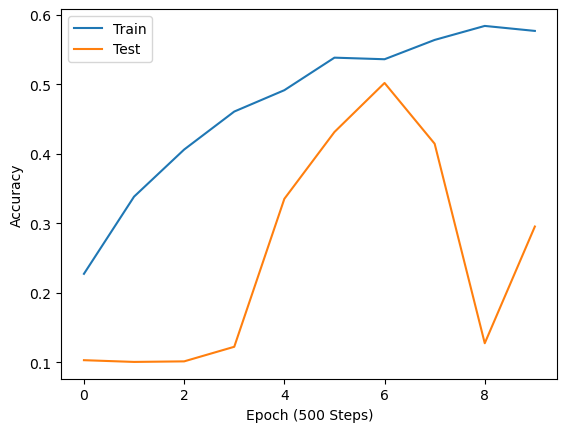

In [ ]:
plt.figure()
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.xlabel('Epoch (500 Steps)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()